In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('df_cleaned (1).xlsx')  # Replace with your file path
print(df.info())
print(df.head())


Saving df_cleaned (1).xlsx to df_cleaned (1).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8359 entries, 0 to 8358
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Low Fuel Warning Light           8359 non-null   bool   
 1   transmission                     8359 non-null   object 
 2   Color                            8359 non-null   object 
 3   Seat Belt Warning                8359 non-null   bool   
 4   Rear Brake Type                  8359 non-null   object 
 5   Electronic Multi Tripmeter       8359 non-null   bool   
 6   Air Conditioner                  8359 non-null   bool   
 7   Adjustable Head Lights           8359 non-null   bool   
 8   Gear Box                         8359 non-null   object 
 9   km                               8359 non-null   object 
 10  city                             8359 non-null   object 
 11  Heater                          

In [ ]:
print(df.describe())

           ownerNo         price    Max Power  No of Cylinder    modelYear  \
count  8359.000000  8.359000e+03  8359.000000     8359.000000  8359.000000   
mean      1.359014  9.576776e+05   105.047717        3.803086  2016.515133   
std       0.641136  1.416827e+06    46.369649        0.593887     3.899458   
min       0.000000  2.016100e+04    25.400000        2.000000  1985.000000   
25%       1.000000  4.000000e+05    78.900000        4.000000  2014.000000   
50%       1.000000  6.020000e+05    88.500000        4.000000  2017.000000   
75%       2.000000  9.500000e+05   118.410000        4.000000  2019.000000   
max       5.000000  4.150000e+07   576.630000       23.000000  2023.000000   

            Torque  Kerb Weight       Height       Length        Width  \
count  8359.000000  8359.000000  8359.000000  8359.000000  8359.000000   
mean    177.461666  1177.627826  1557.743510  4069.056107  1716.735734   
std     109.744484   363.544846   176.967017   540.245325   201.752616   
m

In [ ]:
print(df['price'].describe())

count    8.359000e+03
mean     9.576776e+05
std      1.416827e+06
min      2.016100e+04
25%      4.000000e+05
50%      6.020000e+05
75%      9.500000e+05
max      4.150000e+07
Name: price, dtype: float64


In [2]:
df['km'] = df['km'].str.replace(',', '').astype(int)

# Display the cleaned column
print(df)
print(df.isnull().sum())

      Low Fuel Warning Light transmission          Color  Seat Belt Warning  \
0                       True    automatic          black               True   
1                       True       manual           grey              False   
2                       True       manual  miscellaneous               True   
3                       True       manual         silver               True   
4                       True       manual  miscellaneous               True   
...                      ...          ...            ...                ...   
8354                    True       manual  miscellaneous               True   
8355                    True       manual  miscellaneous              False   
8356                    True    automatic  miscellaneous               True   
8357                    True       manual  miscellaneous               True   
8358                    True       manual  miscellaneous               True   

     Rear Brake Type  Electronic Multi Tripmeter  A

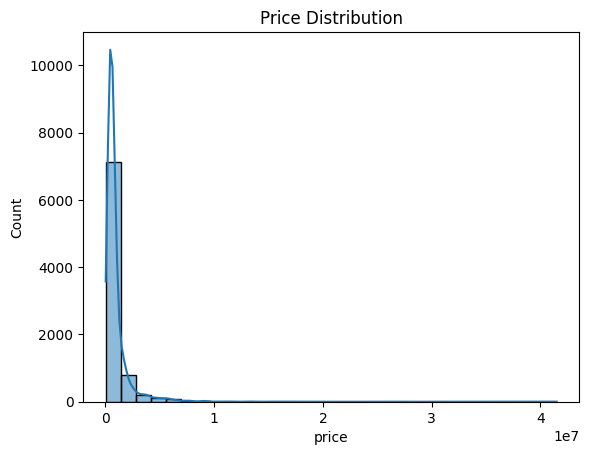

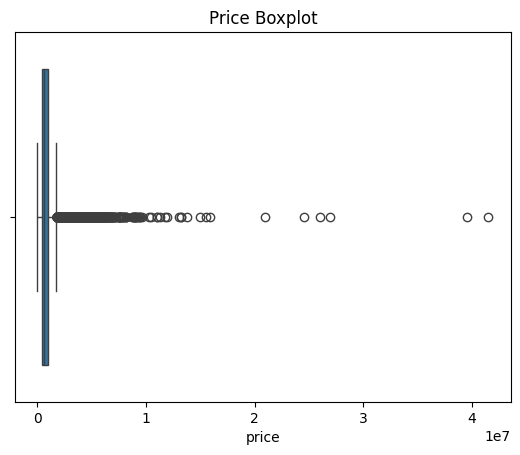

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()

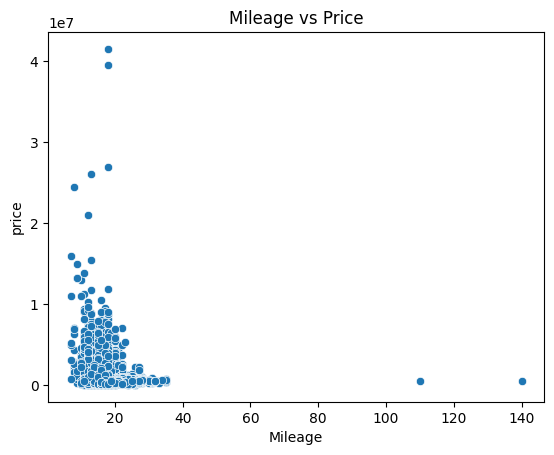

In [ ]:
sns.scatterplot(x='Mileage', y='price', data=df)
plt.title('Mileage vs Price')
plt.show()

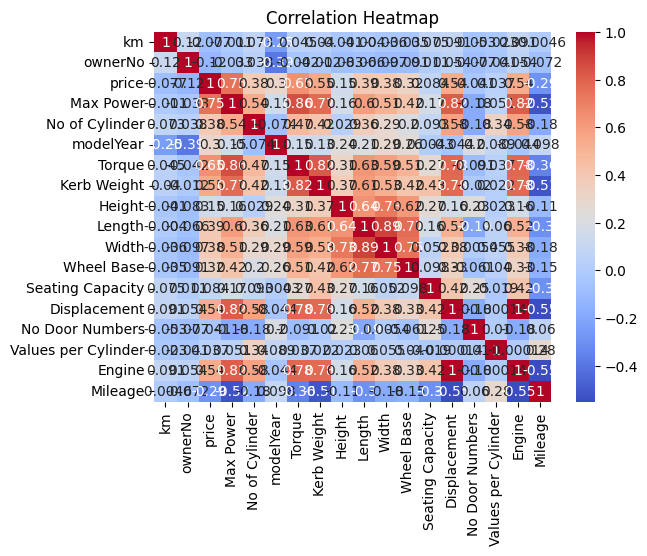

In [3]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation = df_numeric.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
non_unique_values = df['Gear Box'].value_counts()[df['Gear Box'].value_counts() > 1].index.tolist()

print("Non-unique values in 'Gear Box':", non_unique_values)

Non-unique values in 'Gear Box': ['5 speed', '6 speed', '5-speed', '6-speed', '7 speed', '8 speed', '5 speed ', 'cvt', '4 speed', '6 speed ', '9 speed', '5', '7-speed dct', '5 speed cvt', '6-speed imt', '8-speed steptronic', '8-speed', '7-speed', '7 speed dct', '7-speed s-tronic ', '8-speed ', 'ags', '9 speed tronic', '4-speed', '4 speed ', '7-speed dsg', '6 speed imt', '6-speed dct', '9g-tronic', '6-speed ivt', 'ivt', '8 speed tiptronic', '7 speed cvt', '6', 'imt', '8-speed steptronic sport automatic transmission', 'five speed manual', '5-speed`', '9-speed automatic', '7-speed stronic', '6-speed cvt', '7-speed s-tronic', 'five speed manual transmission gearbox', '7 speed dsg', '7 speed 7g-dct', '7g dct 7-speed dual clutch transmission ', '5 speed at+ paddle shifters', '8 speed cvt', 'five speed manual transmission', '8-speed automatic transmission', '8 speed sport', '6 speed at', '9-speed', '9g tronic', 'amg 7-speed dct', '8 speed ', '6-speed autoshift', '6-speed at', '6 speed with se

In [5]:
import pandas as pd



# Define mapping rules
def categorize_gearbox(gearbox):
    gearbox = gearbox.lower()  # Convert to lowercase for uniformity
    if 'manual' in gearbox or 'speed' in gearbox and 'manual' not in gearbox and 'at' not in gearbox:
        return 'Manual Transmission (MT)'
    elif 'automatic' in gearbox or 'steptronic' in gearbox or 'tronic' in gearbox or 'at' in gearbox:
        return 'Automatic Transmission (AT)'
    elif 'cvt' in gearbox:
        return 'Continuously Variable Transmission (CVT)'
    elif 'imt' in gearbox:
        return 'Intelligent Manual Transmission (IMT)'
    elif 'dct' in gearbox:
        return 'Dual-Clutch Transmission (DCT)'
    elif 'single speed' in gearbox or 'direct drive' in gearbox:
        return 'Single Speed or Direct Drive'
    else:
        return 'Other'

# Apply categorization
df['Gear Box Category'] = df['Gear Box'].apply(categorize_gearbox)

# Display the categorized data
print(df)


      Low Fuel Warning Light transmission          Color  Seat Belt Warning  \
0                       True    automatic          black               True   
1                       True       manual           grey              False   
2                       True       manual  miscellaneous               True   
3                       True       manual         silver               True   
4                       True       manual  miscellaneous               True   
...                      ...          ...            ...                ...   
8354                    True       manual  miscellaneous               True   
8355                    True       manual  miscellaneous              False   
8356                    True    automatic  miscellaneous               True   
8357                    True       manual  miscellaneous               True   
8358                    True       manual  miscellaneous               True   

     Rear Brake Type  Electronic Multi Tripmeter  A

In [6]:
df = df.drop(columns=['Gear Box'])

In [7]:
for col in df.select_dtypes(exclude=['number']).columns:
    unique_values = df[col].unique()
    print(f"Unique values in column {col}: {unique_values}")
    print()

Unique values in column Low Fuel Warning Light: [ True False]

Unique values in column transmission: ['automatic' 'manual']

Unique values in column Color: ['black' 'grey' 'miscellaneous' 'silver' 'white' 'blue' 'orange' 'brown'
 'red' 'green' 'gold' 'yellow' 'violet' 'purple']

Unique values in column Seat Belt Warning: [ True False]

Unique values in column Rear Brake Type: ['drum' 'disc' 'electric parking brake']

Unique values in column Electronic Multi Tripmeter: [ True False]

Unique values in column Air Conditioner: [ True False]

Unique values in column Adjustable Head Lights: [ True False]

Unique values in column city: ['chennai' 'bangalore' 'delhi' 'hyderabad' 'jaipur' 'kolkata']

Unique values in column Heater: [ True False]

Unique values in column Digital Clock: [ True False]

Unique values in column Centeral Locking: [ True False]

Unique values in column oem: ['kia' 'maruti' 'nissan' 'hyundai' 'honda' 'mercedes-benz' 'bmw' 'ford'
 'tata' 'jeep' 'toyota' 'audi' 'mahindra

In [8]:
unique_counts = df.select_dtypes(exclude=['number']).nunique().sort_values(ascending=False)

# Print sorted unique counts
for col, count in unique_counts.items():
    print(f"Unique count in non-numeric column {col}: {count}")

Unique count in non-numeric column Engine Type: 487
Unique count in non-numeric column model: 309
Unique count in non-numeric column oem: 33
Unique count in non-numeric column Color: 14
Unique count in non-numeric column bt: 10
Unique count in non-numeric column Gear Box Category: 7
Unique count in non-numeric column city: 6
Unique count in non-numeric column Fuel Type: 5
Unique count in non-numeric column Front Brake Type: 4
Unique count in non-numeric column Tyre Type: 4
Unique count in non-numeric column Insurance Validity: 3
Unique count in non-numeric column Rear Brake Type: 3
Unique count in non-numeric column Power Windows Front: 2
Unique count in non-numeric column Adjustable Seats: 2
Unique count in non-numeric column Seat Belt Warning: 2
Unique count in non-numeric column Digital Odometer: 2
Unique count in non-numeric column Engine Immobilizer: 2
Unique count in non-numeric column Child Safety Locks: 2
Unique count in non-numeric column Tachometer: 2
Unique count in non-nume

In [9]:
# Function to categorize engine types
import pandas as pd


def categorize_engine_type(engine_type):
    engine_type = str(engine_type).lower()

    if "turbo" in engine_type and "petrol" in engine_type:
        return "Turbocharged Petrol Engines"
    elif "turbo" in engine_type and "diesel" in engine_type:
        return "Turbocharged Diesel Engines"
    elif "hybrid" in engine_type or "electric" in engine_type:
        if "diesel" in engine_type:
            return "Hybrid Diesel Engines"
        elif "petrol" in engine_type:
            return "Hybrid Petrol Engines"
        else:
            return "Electric Engines"
    elif "biturbo" in engine_type or "performance" in engine_type or "quattro" in engine_type:
        return "Performance Engines"
    elif "diesel" in engine_type:
        if "vgt" in engine_type or "crdi" in engine_type or "tdi" in engine_type:
            return "Turbocharged Diesel Engines"
        else:
            return "Naturally Aspirated Diesel Engines"
    elif "petrol" in engine_type:
        if "kappa" in engine_type or "mpi" in engine_type or "naturally" in engine_type:
            return "Naturally Aspirated Petrol Engines"
        else:
            return "Compact Engines"
    elif "dual" in engine_type or "bi-fuel" in engine_type:
        return "Dual-Fuel Engines"
    elif "v6" in engine_type or "v8" in engine_type or "suv" in engine_type:
        return "SUV/Truck Engines"
    elif "fire" in engine_type or "mhawk" in engine_type or "smartech" in engine_type:
        return "Manufacturer-Specific Engines"
    else:
        return "Other Engines"

df['Engine Type'] = df['Engine Type'].apply(categorize_engine_type)


print("Updated data saved to 'Updated_Engine_Types.xlsx'")



Updated data saved to 'Updated_Engine_Types.xlsx'


Low Fuel Warning Light             0
transmission                       0
Color                              0
Seat Belt Warning                  0
Rear Brake Type                    0
Electronic Multi Tripmeter         0
Air Conditioner                    0
Adjustable Head Lights             0
km                                 0
city                               0
Heater                             0
Digital Clock                      0
Centeral Locking                   0
oem                                0
Glove Compartment                  0
Power Steering                     0
Tyre Type                          0
bt                                 0
Rear Seat Belts                    0
Fuel Type                          0
Rear Seat Headrest                 0
Transmission                       0
ownerNo                            0
Accessory Power Outlet             0
price                              0
Max Power                          0
Insurance Validity                 0
P

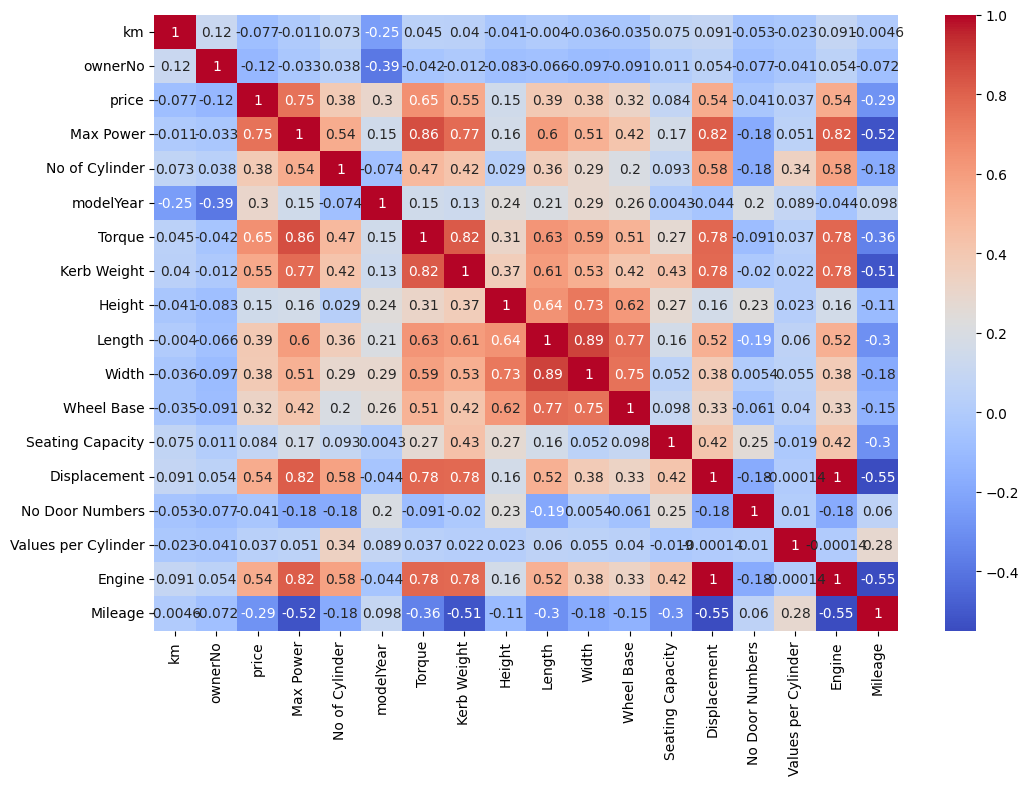

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



# Step 1: Check for missing values
print(df.isnull().sum())

# Step 2: Analyze numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].describe()

# Step 3: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
#encoding non numerical columns for model creation
import pandas as pd
from sklearn.preprocessing import LabelEncoder

list_1_target_encoding = ['Fuel Type', 'Gear Box Category', 'Engine Type', 'model', 'bt', 'Tyre Type', 'oem', 'city', 'Color']
list_2_one_hot_encoding = ['Front Brake Type', 'Steering Type']
list_3_label_encoding = ['Insurance Validity', 'Transmission', 'Rear Brake Type']

for col in list_1_target_encoding:
    target_means = df.groupby(col)['price'].mean()
    df[f'{col}_Encoded'] = df[col].map(target_means)

df_one_hot = pd.get_dummies(df[list_2_one_hot_encoding], prefix=list_2_one_hot_encoding, drop_first=False)
df = pd.concat([df, df_one_hot], axis=1)

label_encoder = LabelEncoder()
for col in list_3_label_encoding:
    df[f'{col}_Encoded'] = label_encoder.fit_transform(df[col])

def encode_boolean_columns(df):
    boolean_like_columns = []
    for col in df.columns:
        if df[col].dtype == 'bool':
            boolean_like_columns.append(col)
        elif df[col].dtype == 'object' and df[col].str.lower().isin(['yes', 'no', 'true', 'false']).all():
            boolean_like_columns.append(col)
        elif df[col].dtype in ['int64', 'float64'] and df[col].isin([0, 1]).all():
            boolean_like_columns.append(col)

    for col in boolean_like_columns:
        df[f'{col}_Encoded'] = df[col]
        if df[col].dtype == 'object':
            df[f'{col}_Encoded'] = df[col].str.lower().map({'yes': 1, 'no': 0, 'true': 1, 'false': 0})
        elif df[col].dtype in ['bool', 'int64', 'float64']:
            df[f'{col}_Encoded'] = df[col].astype(int)

    return df


df = encode_boolean_columns(df)


print(df)


      Low Fuel Warning Light transmission          Color  Seat Belt Warning  \
0                       True    automatic          black               True   
1                       True       manual           grey              False   
2                       True       manual  miscellaneous               True   
3                       True       manual         silver               True   
4                       True       manual  miscellaneous               True   
...                      ...          ...            ...                ...   
8354                    True       manual  miscellaneous               True   
8355                    True       manual  miscellaneous              False   
8356                    True    automatic  miscellaneous               True   
8357                    True       manual  miscellaneous               True   
8358                    True       manual  miscellaneous               True   

     Rear Brake Type  Electronic Multi Tripmeter  A

In [12]:
print(df.columns)

Index(['Low Fuel Warning Light', 'transmission', 'Color', 'Seat Belt Warning',
       'Rear Brake Type', 'Electronic Multi Tripmeter', 'Air Conditioner',
       'Adjustable Head Lights', 'km', 'city', 'Heater', 'Digital Clock',
       'Centeral Locking', 'oem', 'Glove Compartment', 'Power Steering',
       'Tyre Type', 'bt', 'Rear Seat Belts', 'Fuel Type', 'Rear Seat Headrest',
       'Transmission', 'ownerNo', 'Accessory Power Outlet', 'price',
       'Max Power', 'Insurance Validity', 'Power Windows Front',
       'Speakers Front', 'Passenger Side Rear View Mirror', 'Steering Type',
       'Tachometer', 'No of Cylinder', 'Child Safety Locks', 'modelYear',
       'Engine Immobilizer', 'Digital Odometer', 'model', 'Engine Type',
       'Front Brake Type', 'Torque', 'Adjustable Seats', 'Kerb Weight',
       'Height', 'Length', 'Width', 'Wheel Base', 'Seating Capacity',
       'Displacement', 'No Door Numbers', 'Values per Cylinder', 'Engine',
       'Mileage', 'Gear Box Category', 'Fuel

In [13]:
df.to_excel('dfupdate.xlsx', index=False)
print(df)

files.download('dfupdate.xlsx')

      Low Fuel Warning Light transmission          Color  Seat Belt Warning  \
0                       True    automatic          black               True   
1                       True       manual           grey              False   
2                       True       manual  miscellaneous               True   
3                       True       manual         silver               True   
4                       True       manual  miscellaneous               True   
...                      ...          ...            ...                ...   
8354                    True       manual  miscellaneous               True   
8355                    True       manual  miscellaneous              False   
8356                    True    automatic  miscellaneous               True   
8357                    True       manual  miscellaneous               True   
8358                    True       manual  miscellaneous               True   

     Rear Brake Type  Electronic Multi Tripmeter  A

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>